<a href="https://colab.research.google.com/github/Antel0pe/VoronoiDiagrams/blob/main/Voronoi_Diagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

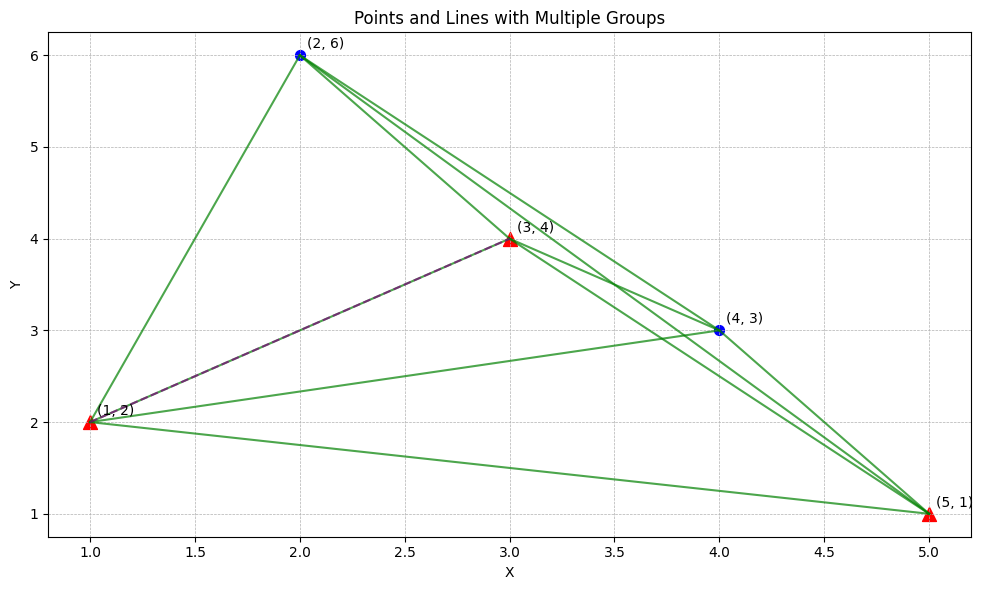

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_2d_points(point_groups=None, line_groups=None, title='2D Points', xlabel='X', ylabel='Y',
                   point_group_colors=None, point_group_markers=None, point_group_sizes=None,
                   line_group_colors=None, line_group_styles=None,
                   grid=True, annotate=False, connect_points=False):
    """
    Plot multiple groups of 2D points and line groups with customizable styles.

    Parameters:
    - point_groups: List of lists, where each inner list contains points as (x, y) tuples
    - line_groups: List of lists, where each inner list contains line tuples ((start_x, start_y), (end_x, end_y))
    - title: Title of the plot (default: '2D Points')
    - xlabel: Label for x-axis (default: 'X')
    - ylabel: Label for y-axis (default: 'Y')
    - point_group_colors: List of colors for point groups
    - point_group_markers: List of marker styles for point groups
    - point_group_sizes: List of point sizes for each group
    - line_group_colors: List of colors for line groups
    - line_group_styles: List of line styles for line groups
    - grid: Show grid lines (default: True)
    - annotate: Add point coordinates as text labels (default: False)
    - connect_points: Draw lines connecting the points in order (default: False)

    Returns:
    - matplotlib Figure and Axes objects for further customization
    """
    # Create the plot
    plt.figure(figsize=(10, 6))

    # Default color and marker cycles
    default_colors = plt.cm.Set1.colors
    default_markers = ['o', '^', 's', 'p', '*', '+', 'x', 'D']
    default_line_styles = ['-', '--', '-.', ':']

    # Plot point groups if provided
    if point_groups is not None:
        # Ensure we have enough colors, markers, and sizes
        point_group_colors = point_group_colors or [default_colors[i % len(default_colors)] for i in range(len(point_groups))]
        point_group_markers = point_group_markers or [default_markers[i % len(default_markers)] for i in range(len(point_groups))]
        point_group_sizes = point_group_sizes or [50] * len(point_groups)

        # Plot each group of points
        for group_idx, point_group in enumerate(point_groups):
            points_array = np.array(point_group)

            plt.scatter(points_array[:, 0], points_array[:, 1],
                        color=point_group_colors[group_idx],
                        marker=point_group_markers[group_idx],
                        s=point_group_sizes[group_idx])

            # Optionally annotate points
            if annotate:
                for (x, y) in point_group:
                    plt.annotate(f'({x}, {y})', (x, y),
                                 xytext=(5, 5), textcoords='offset points')

            # Optionally connect points within the group
            if connect_points:
                plt.plot(points_array[:, 0], points_array[:, 1],
                         color=point_group_colors[group_idx],
                         linestyle='--',
                         alpha=0.5)

    # Plot line groups if provided
    if line_groups is not None:
        # Ensure we have enough colors and styles
        line_group_colors = line_group_colors or [default_colors[i % len(default_colors)] for i in range(len(line_groups))]
        line_group_styles = line_group_styles or [default_line_styles[i % len(default_line_styles)] for i in range(len(line_groups))]

        # Plot each group of lines
        for group_idx, line_group in enumerate(line_groups):
            color = line_group_colors[group_idx]
            line_style = line_group_styles[group_idx]

            for line in line_group:
                # Unpack start and end points
                (x1, y1), (x2, y2) = line
                plt.plot([x1, x2], [y1, y2],
                         color=color,
                         linestyle=line_style,
                         alpha=0.7)

    # Customize plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add grid if requested
    if grid:
        plt.grid(True, linestyle='--', linewidth=0.5)

    # Adjust layout
    plt.tight_layout()

    return plt.gcf(), plt.gca()

# Example usage
def example_usage():
    # Sample point groups
    point_groups = [
        [(1, 2), (3, 4), (5, 1)],  # First group
        [(2, 6), (4, 3)]            # Second group
    ]

    # Sample line groups
    line_groups = [
        [((1, 2), (3, 4)), ((1, 2), (5, 1)), ((1, 2), (2, 6)),
         ((1, 2), (4, 3)), ((3, 4), (5, 1)), ((3, 4), (2, 6)),
         ((3, 4), (4, 3)), ((5, 1), (2, 6)), ((5, 1), (4, 3)),
         ((2, 6), (4, 3))],
        [((1, 2), (3, 4))]
    ]

    # Plot with point and line groups
    plot_2d_points(point_groups=point_groups,
                   line_groups=line_groups,
                   title='Points and Lines with Multiple Groups',
                   annotate=True,
                   point_group_colors=['red', 'blue'],
                   point_group_markers=['^', 'o'],
                   point_group_sizes=[100, 50],
                   line_group_colors=['green', 'purple'],
                   line_group_styles=['-', '--'])
    plt.show()

# Uncomment to run example
# example_usage()

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': '2D Points'}, xlabel='X', ylabel='Y'>)

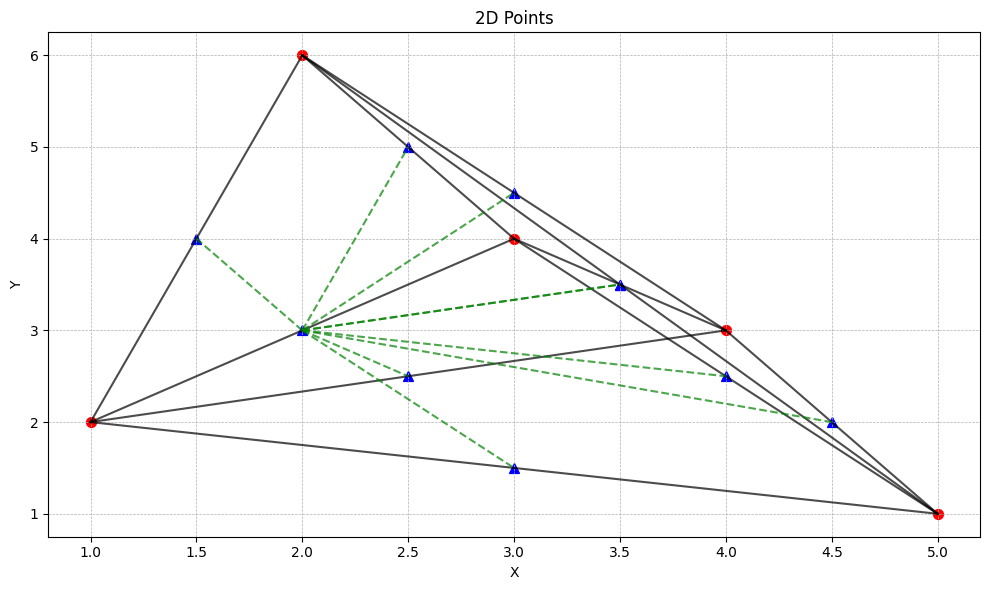

In [24]:
points = [(1, 2), (3, 4), (5, 1), (2, 6), (4, 3)]
lines = []

# Line to every other vertex
lineToEveryVertex = []
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        lineToEveryVertex.append((points[i], points[j]))

# Split line segment in half
midPoints = []
for i in lineToEveryVertex:
    (x1, y1), (x2, y2) = i
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    midPoints.append((mid_x, mid_y))

# find center of triangles
linesToCenterOfTriangles = []
firstx1, firsty1 = midPoints[0]
for i in range(1, len(midPoints)):
    linesToCenterOfTriangles.append(((firstx1, firsty1), midPoints[i]))


lines = [lineToEveryVertex, linesToCenterOfTriangles]
point_groups = [points, midPoints]
plot_2d_points(point_groups=point_groups, point_group_colors=['red', 'blue'], line_groups=lines, line_group_colors=['black', 'green'])